In [1]:
import os
import sys
import time
import datetime
import numpy as np
import pandas as pd
import nibabel as nib
from scipy import spatial
from nibabel import freesurfer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


In [2]:
endpoints = nib.streamlines.load('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.tck')


In [9]:
endpoints.header


{'act': '/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/5tt.freesurfer.mif',
 'backtrack': '0',
 'command_history': 'tckresample -endpoints /home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M.tck /home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.tck  (version=3.0.3-49-g99449855)',
 'downsample_factor': '2',
 'fod_power': '0.5',
 'init_threshold': '0.100000001',
 'lmax': '8',
 'max_angle': '45',
 'max_dist': '250',
 'max_num_seeds': '10000000',
 'max_num_tracks': '0',
 'max_seed_attempts': '1000',
 'max_trials': '1000',
 'method': 'iFOD2',
 'min_dist': '4.025599',
 'mrtrix_version': '3.0.3-49-g99449855',
 'rk4': '0',
 'samples_per_step': '3',
 'sh_precomputed': '1',
 'source': '/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/wmfod_norm.mif',
 'step_size': '1.00639975',
 'stop_on_all_include': '0',
 'threshold': '0.1',
 'timestamp': '16447

In [3]:
endpoints.streamlines.save()


ArraySequence([array([[ 23.015995, -62.55635 , -66.051346],
       [ 17.71728 , -66.0785  , -64.794   ]], dtype=float32), array([[ 30.361687 ,  -6.0341177, -27.684536 ],
       [ 18.205427 , -59.94459  ,  -1.8957124]], dtype=float32), array([[ 48.14409   , -48.053276  ,   0.40265656],
       [ 50.775444  , -49.350384  ,   4.0755424 ]], dtype=float32), ..., array([[ 28.455708, -46.57361 , -56.3227  ],
       [ 30.496923, -51.97722 , -57.366623]], dtype=float32), array([[48.56025  , 12.222488 , -1.5857627],
       [18.343666 ,  6.581645 , 19.353113 ]], dtype=float32), array([[ 35.915916 , -10.147615 ,  12.075037 ],
       [ 31.966494 , -10.607848 ,   5.9813457]], dtype=float32)])

In [15]:
len(endpoints.streamlines)

2190667

In [17]:
arr = np.array(endpoints.streamlines)

In [18]:
arr.shape

(2190667, 2, 3)

In [23]:
arr.dtype

dtype('float32')

In [34]:
# np.save('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.npy', arr) # ~50MB
# np.save('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.npy', arr.astype(np.float16)) # ~25MB

# compression did not help that much
# np.savez_compressed('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.npz', endpoints=arr.astype(np.float16)) # ~25MB

# np.savetxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.txt', arr.reshape((arr.shape[0], -1)), fmt='%.3f') # ~100MB
# np.savetxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.txt.gz', arr.reshape((arr.shape[0], -1)), fmt='%.3f') # ~40MB
# np.savetxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.txt', arr.reshape((arr.shape[0], -1)), fmt='%.2f') # ~85MB
# np.savetxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.txt.gz', arr.reshape((arr.shape[0], -1)), fmt='%.2f') # ~32MB
# np.savetxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.txt', arr.reshape((arr.shape[0], -1)), fmt='%.1f') # ~71MB
# np.savetxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.txt.gz', arr.reshape((arr.shape[0], -1)), fmt='%.1f') # ~25MB


In [21]:
arr.astype(np.float16)

array([[[ 23.02  , -62.56  , -66.06  ],
        [ 17.72  , -66.06  , -64.8   ]],

       [[ 30.36  ,  -6.035 , -27.69  ],
        [ 18.2   , -59.94  ,  -1.8955]],

       [[ 48.16  , -48.06  ,   0.4026],
        [ 50.78  , -49.34  ,   4.074 ]],

       ...,

       [[ 28.45  , -46.56  , -56.3   ],
        [ 30.5   , -51.97  , -57.38  ]],

       [[ 48.56  ,  12.22  ,  -1.586 ],
        [ 18.34  ,   6.582 ,  19.36  ]],

       [[ 35.9   , -10.15  ,  12.08  ],
        [ 31.97  , -10.61  ,   5.98  ]]], dtype=float16)

In [27]:
arr.reshape((arr.shape[0], -1))

array([[ 23.015995  , -62.55635   , -66.051346  ,  17.71728   ,
        -66.0785    , -64.794     ],
       [ 30.361687  ,  -6.0341177 , -27.684536  ,  18.205427  ,
        -59.94459   ,  -1.8957124 ],
       [ 48.14409   , -48.053276  ,   0.40265656,  50.775444  ,
        -49.350384  ,   4.0755424 ],
       ...,
       [ 28.455708  , -46.57361   , -56.3227    ,  30.496923  ,
        -51.97722   , -57.366623  ],
       [ 48.56025   ,  12.222488  ,  -1.5857627 ,  18.343666  ,
          6.581645  ,  19.353113  ],
       [ 35.915916  , -10.147615  ,  12.075037  ,  31.966494  ,
        -10.607848  ,   5.9813457 ]], dtype=float32)

In [4]:
sw = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/sift_weights.txt')

In [5]:
sw.shape

(2190667,)

In [6]:
np.unique(sw)

array([1.])

/home/sina/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

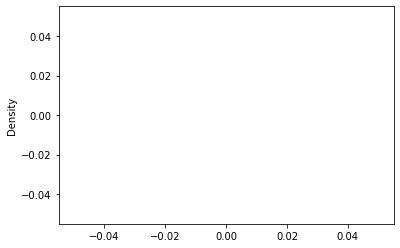

In [39]:
sns.kdeplot(sw)

In [71]:
fa = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_FA_mean.txt')

In [43]:
fa.shape

(2190667,)

In [45]:
fa

array([0.15744527, 0.43641067, 0.31822553, ..., 0.1769983 , 0.41859964,
       0.15124135])

In [51]:
fa.astype(np.float32)

array([0.15744527, 0.43641067, 0.31822553, ..., 0.1769983 , 0.41859964,
       0.15124135], dtype=float32)

In [58]:
fa16 = fa.astype(np.float16)

In [59]:
fa16

array([0.1575, 0.4365, 0.318 , ..., 0.177 , 0.4187, 0.1512], dtype=float16)

<AxesSubplot:ylabel='Density'>

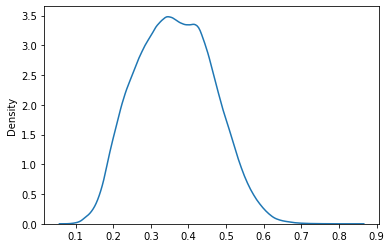

In [46]:
sns.kdeplot(fa)

<AxesSubplot:ylabel='Density'>

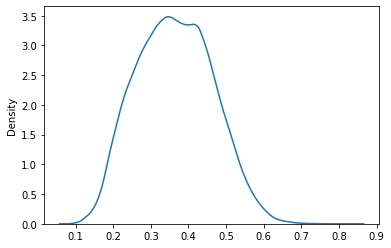

In [61]:
sns.kdeplot(fa16.astype(np.float32))

In [47]:
fa.dtype

dtype('float64')

In [62]:
# np.save('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_FA_mean.npy', fa) # ~18MB
# np.save('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_FA_mean.npy', fa.astype(np.float32)) # ~9MB
np.save('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_FA_mean.npy', fa.astype(np.float16)) # ~5MB


In [63]:
lng = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_length.txt')

In [64]:
lng

array([ 7.96018, 91.7795 ,  4.97296, ...,  6.00017, 56.8669 ,  7.52844])

In [65]:
lng.astype(np.float32)

array([ 7.96018, 91.7795 ,  4.97296, ...,  6.00017, 56.8669 ,  7.52844],
      dtype=float32)

In [66]:
lng.astype(np.float16)

array([ 7.96 , 91.75 ,  4.973, ...,  6.   , 56.88 ,  7.527], dtype=float16)

<AxesSubplot:ylabel='Density'>

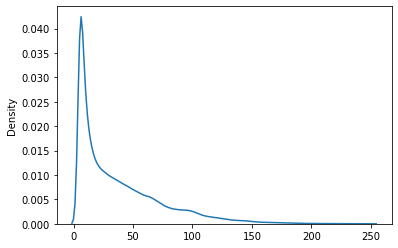

In [75]:
sns.kdeplot(lng)

In [69]:
# np.save('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_length.npy', lng) # ~18MB
# np.save('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_length.npy', lng.astype(np.float32)) # ~9MB
np.save('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_length.npy', lng.astype(np.float16)) # ~5MB


In [72]:
md = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_MD_mean.txt')
md

array([0.00073153, 0.00073057, 0.00073531, ..., 0.00074718, 0.00070892,
       0.00086867])

In [73]:
md.astype(np.float32)

array([0.00073153, 0.00073057, 0.00073531, ..., 0.00074718, 0.00070892,
       0.00086867], dtype=float32)

In [74]:
md.astype(np.float16)

array([0.0007315, 0.0007305, 0.0007353, ..., 0.000747 , 0.000709 ,
       0.000869 ], dtype=float16)

<AxesSubplot:ylabel='Density'>

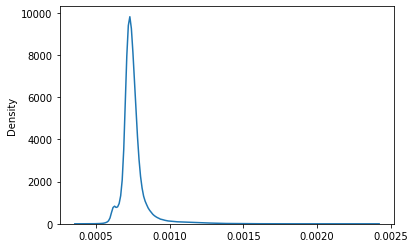

In [76]:
sns.kdeplot(md)

In [7]:
sns.kdeplot(fa16.astype(np.float32))

NameError: name 'fa16' is not defined

In [12]:
ln = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_length.txt')
fa = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_FA_mean.txt')
md = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_MD_mean.txt')
mo = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_MO_mean.txt')
s0 = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_S0_mean.txt')
icvf = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_NODDI_ICVF_mean.txt')
isovf = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_NODDI_ISOVF_mean.txt')
od = np.loadtxt('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_NODDI_OD_mean.txt')


length


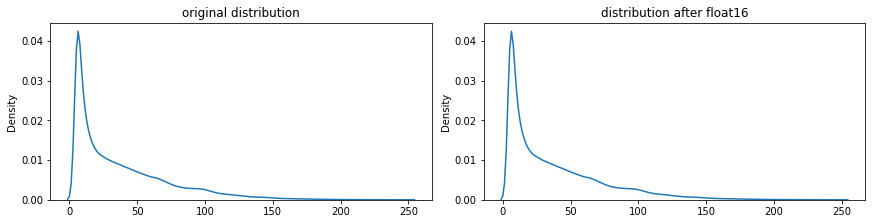

In [13]:
fig = plt.figure(figsize=(12, 3),constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

var = ln
sns.kdeplot(var, ax=ax0)
ax0.set_title('original distribution')
sns.kdeplot((var.astype(np.float16)).astype(np.float32), ax=ax1)
ax1.set_title('distribution after float16')

print('length')

FA


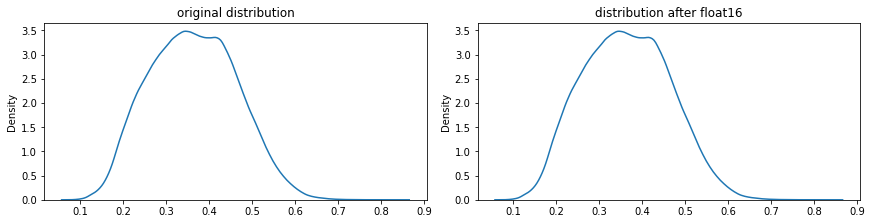

In [14]:
fig = plt.figure(figsize=(12, 3),constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

var = fa
sns.kdeplot(var, ax=ax0)
ax0.set_title('original distribution')
sns.kdeplot((var.astype(np.float16)).astype(np.float32), ax=ax1)
ax1.set_title('distribution after float16')

print('FA')

MD


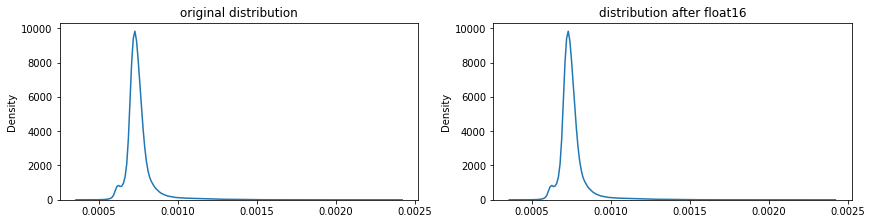

In [15]:
fig = plt.figure(figsize=(12, 3),constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

var = md
sns.kdeplot(var, ax=ax0)
ax0.set_title('original distribution')
sns.kdeplot((var.astype(np.float16)).astype(np.float32), ax=ax1)
ax1.set_title('distribution after float16')

print('MD')

MO


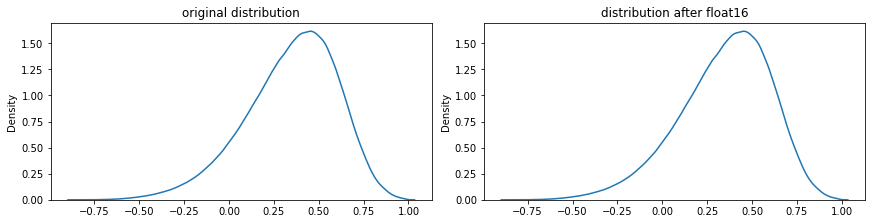

In [16]:
fig = plt.figure(figsize=(12, 3),constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

var = mo
sns.kdeplot(var, ax=ax0)
ax0.set_title('original distribution')
sns.kdeplot((var.astype(np.float16)).astype(np.float32), ax=ax1)
ax1.set_title('distribution after float16')

print('MO')

S0


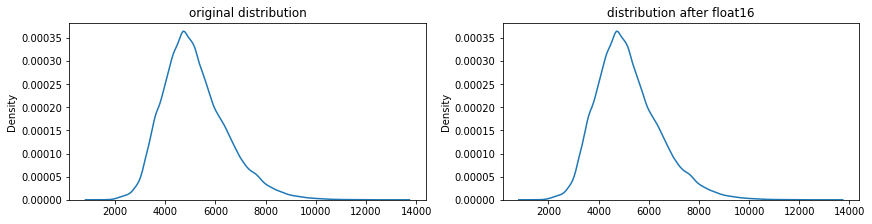

In [17]:
fig = plt.figure(figsize=(12, 3),constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

var = s0
sns.kdeplot(var, ax=ax0)
ax0.set_title('original distribution')
sns.kdeplot((var.astype(np.float16)).astype(np.float32), ax=ax1)
ax1.set_title('distribution after float16')

print('S0')

NODDI_ICVF


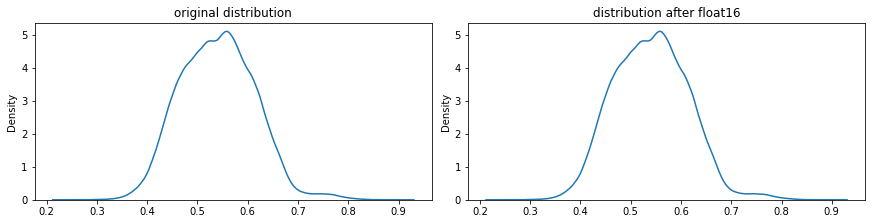

In [18]:
fig = plt.figure(figsize=(12, 3),constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

var = icvf
sns.kdeplot(var, ax=ax0)
ax0.set_title('original distribution')
sns.kdeplot((var.astype(np.float16)).astype(np.float32), ax=ax1)
ax1.set_title('distribution after float16')

print('NODDI_ICVF')

NODDI_ISOVF


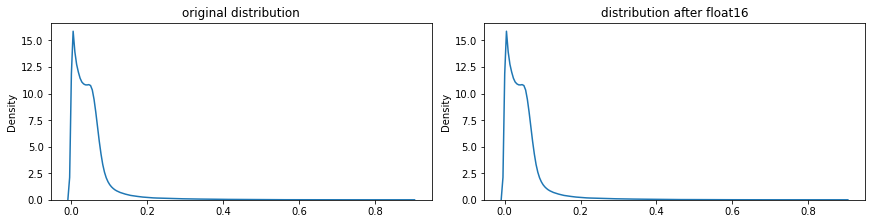

In [19]:
fig = plt.figure(figsize=(12, 3),constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

var = isovf
sns.kdeplot(var, ax=ax0)
ax0.set_title('original distribution')
sns.kdeplot((var.astype(np.float16)).astype(np.float32), ax=ax1)
ax1.set_title('distribution after float16')

print('NODDI_ISOVF')

NODDI_OD


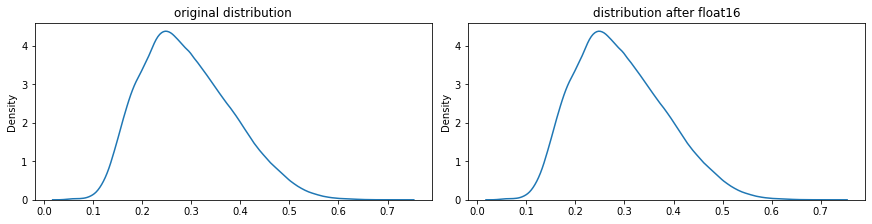

In [20]:
fig = plt.figure(figsize=(12, 3),constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

var = od
sns.kdeplot(var, ax=ax0)
ax0.set_title('original distribution')
sns.kdeplot((var.astype(np.float16)).astype(np.float32), ax=ax1)
ax1.set_title('distribution after float16')

print('NODDI_OD')

In [21]:
mfa = np.load('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/streamline_metric_FA_mean.npy')

In [22]:
mfa[:10]

array([0.1575, 0.4365, 0.318 , 0.2805, 0.4377, 0.2937, 0.491 , 0.4546,
       0.1855, 0.3127], dtype=float16)

In [23]:
fa[:10]

array([0.15744527, 0.43641067, 0.31822553, 0.2804164 , 0.43775484,
       0.29363441, 0.49092051, 0.454633  , 0.18550219, 0.31272969])

In [29]:
msift = np.load('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/sift_weights.npy')
msift[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float16)

In [30]:
mend = np.load('/home/sina/Documents/Research/Datasets/UK_biobank/sample/1000243_2_0/dMRI/dMRI/tracks_10M_endpoints.npy')

In [31]:
mend

array([[[ 23.02  , -62.56  , -66.06  ],
        [ 17.72  , -66.06  , -64.8   ]],

       [[ 30.36  ,  -6.035 , -27.69  ],
        [ 18.2   , -59.94  ,  -1.8955]],

       [[ 48.16  , -48.06  ,   0.4026],
        [ 50.78  , -49.34  ,   4.074 ]],

       ...,

       [[ 28.45  , -46.56  , -56.3   ],
        [ 30.5   , -51.97  , -57.38  ]],

       [[ 48.56  ,  12.22  ,  -1.586 ],
        [ 18.34  ,   6.582 ,  19.36  ]],

       [[ 35.9   , -10.15  ,  12.08  ],
        [ 31.97  , -10.61  ,   5.98  ]]], dtype=float16)